In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pylab
import scipy.stats as stats

In [3]:
df = pd.read_csv(r'E:\Linear Regression E-commerce Dataset\Ecommerce_Customers')

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## pairplot для всех числовых значений

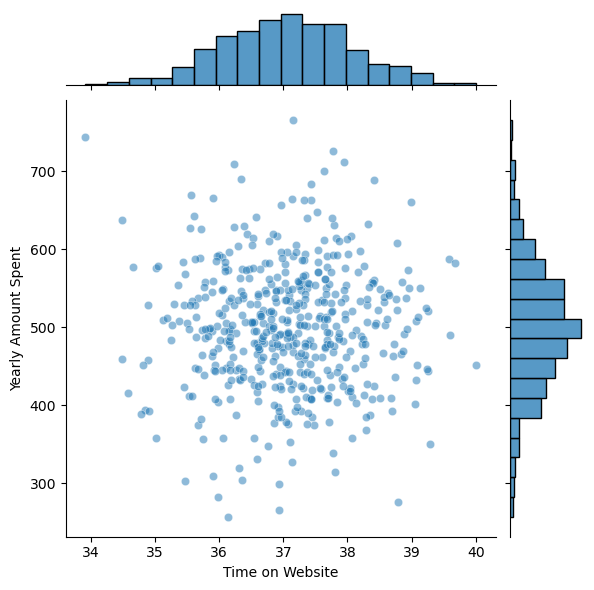

In [6]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data=df, alpha = 0.5)

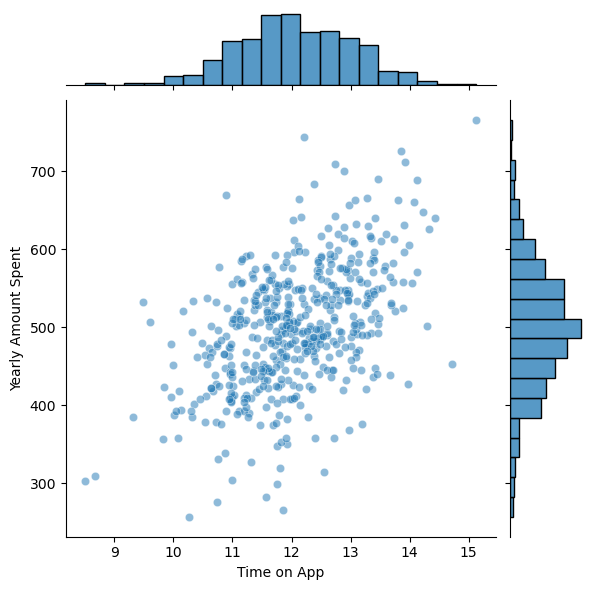

In [7]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data=df, alpha = 0.5)

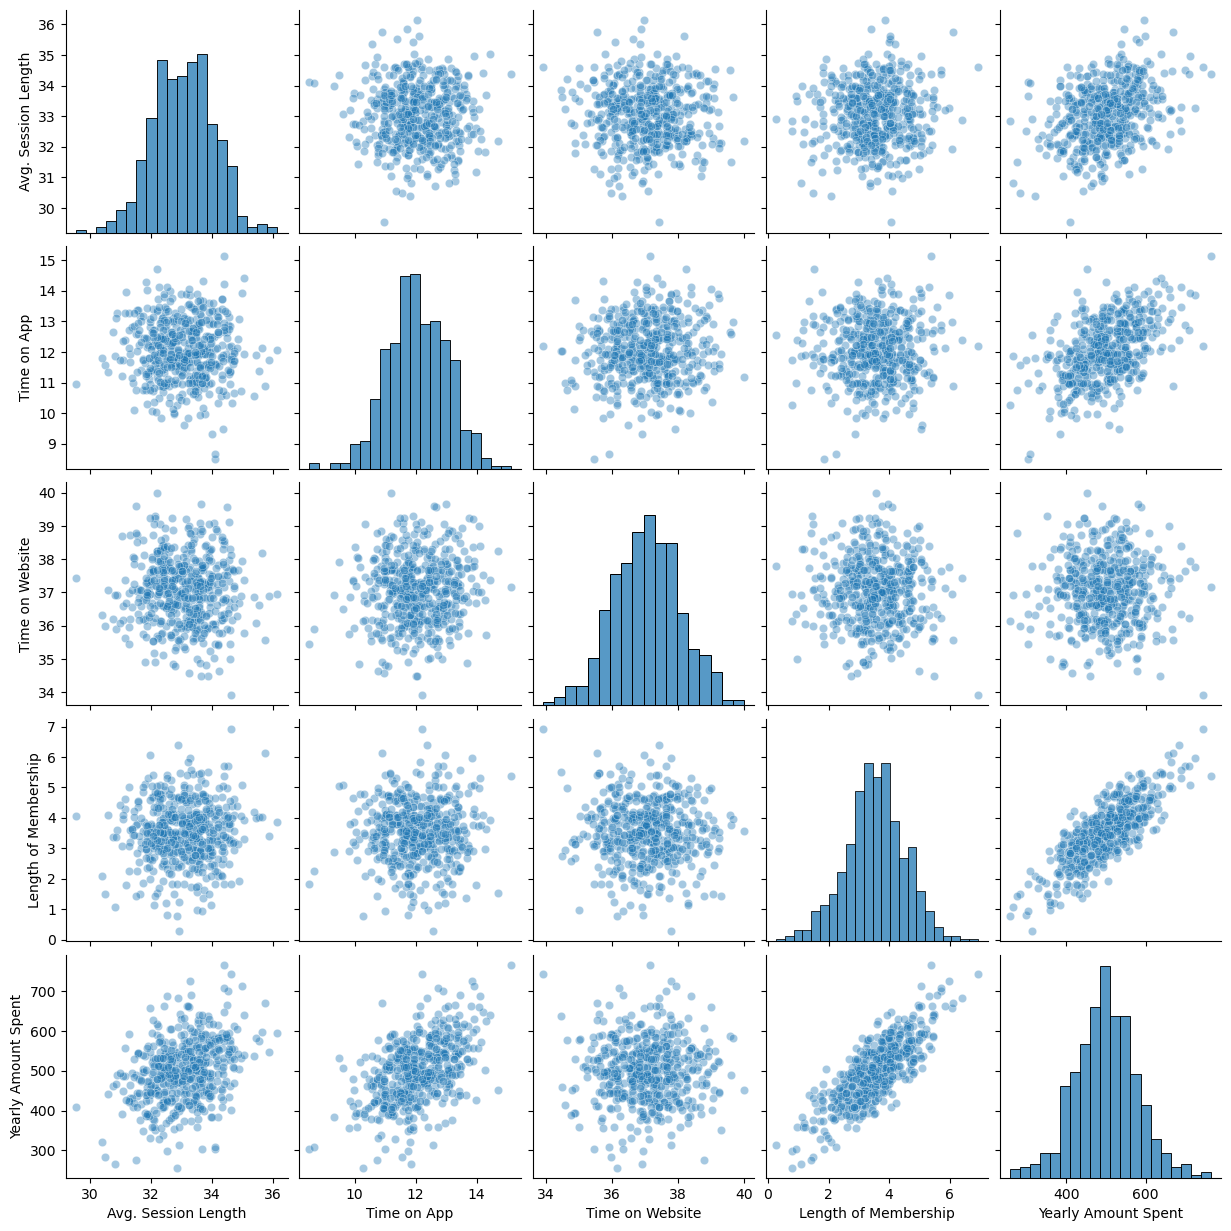

In [8]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha' : 0.4})

## график линейной регресии

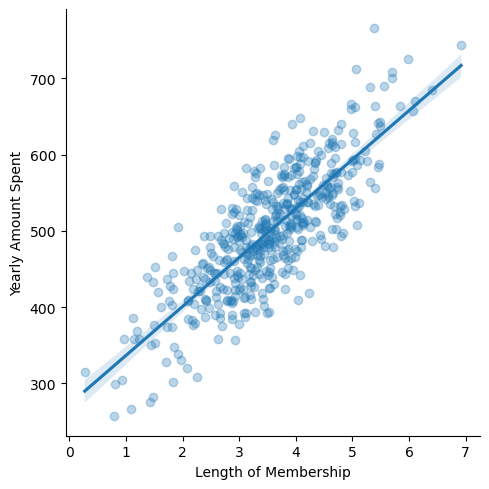

In [9]:
sns.lmplot(x= 'Length of Membership',
          y= 'Yearly Amount Spent',
          data=df,
          scatter_kws={'alpha' : 0.3})

## делим данные с помощью Scikit-Learn

In [10]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] # датасет с предикторами
y = df['Yearly Amount Spent'] # прогнозируемая переменная

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size - насколько большая тестовая выборка (0.3 = 30%)

In [12]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


## тренируем модель

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

## интерпритация коэффициентов

In [15]:
lm.coef_ # возвращает все коэффициеты линейной модели

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [24]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])# величина показывает насколько важны переменные для нашей модели
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## получаем предикторы (спрогнозированные значения)

In [17]:
predictions = lm.predict(X_test)

In [18]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

## сверка рассчитанных и фактических значений

C:\Users\Sveta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'predictions')

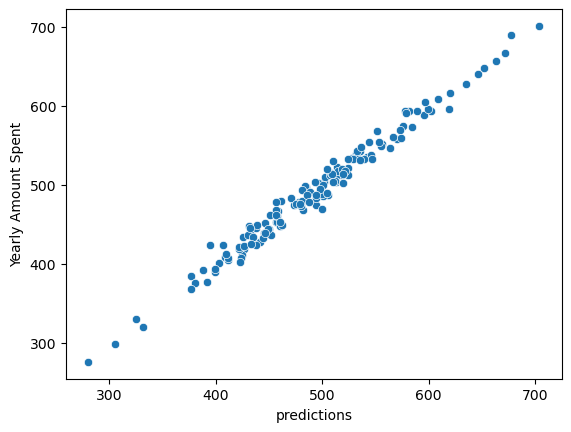

In [19]:
sns.scatterplot(predictions, y_test)
plt.xlabel('predictions')

## оценка ошибок

In [25]:
print('Mean absolute error', mean_absolute_error(y_test, predictions)) 
print('Mean squared error', mean_squared_error(y_test, predictions)) 
print('Root mean squared error', math.sqrt(mean_squared_error(y_test, predictions)))

Mean absolute error 8.426091641432043
Mean squared error 103.91554136503248
Root mean squared error 10.193897260863114


## анализ остатков (residuals)

In [21]:
residuals = y_test - predictions

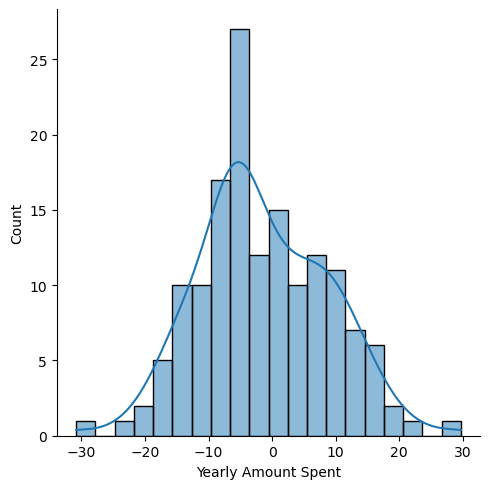

In [22]:
sns.displot(residuals, bins = 20, kde=True)

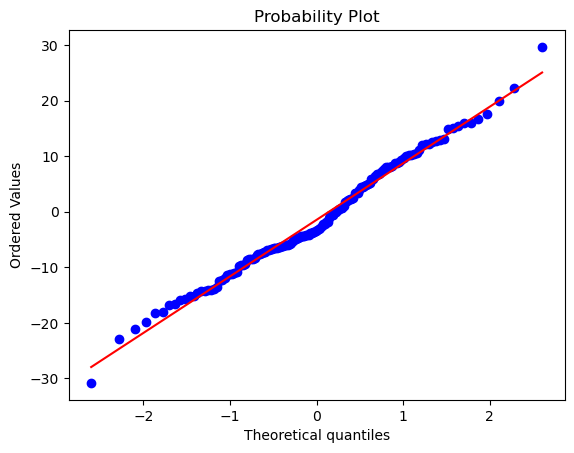

In [23]:
# qq plot
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()